# Superstore Sales & Profit Analysis

The **sample data** is about a USA & Canada retail chain. Retail chains sell goods or services to customers through multiple channels of distribution to earn a profit. Retailers meet the demand identified through a supply chain. This industry operates on the sales of typical product lines of grocery items and merchandise products, such as food, pharmaceuticals, apparel, games and toys, hobby items, furniture and appliances. The analysis of such industry is of great importance as it provides insights on the sales and profits of various products. Our analysis is based on this retail chain bases in USA & Canada (PCA, Kmeans).

**Columns:**

**Order Date**: Date on which a customer places the order (manually separated into month, day, and year).

**Ship Date**: Date on which the order is shipped.

**Ship Mode**: Mode of shipment of each order.

**Customer ID**: ID assigned to each customer who places an order.

**Customer Name**: Name of Customer.

**Segment**: Section from where the order is placed.

**City**: US cities.

**State**: US states.

**Postal Code**: A serial number for sorting mail purposes.

**Region**: USA regions.

**Product ID**: Product ID of each product.

**Category**: Category to which each product belongs to.

**Sub-Category**: Sub Category of each Category.

**Product Name**: Name of products.

**Sales**: Selling price of each product.

**Quantity**: Number of quantity ordered for a particular product.

**Discount**: Discount applied on each product.

**Profit**: Profit gained on each product.

### Dataset Sample

In [1]:
import sys, os, random
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# dataset
data = pd.read_csv("us_sup.csv")
data_w = pd.DataFrame(data)

data_w['Order Date'] = pd.to_datetime(data_w['Order Date'])
data_w['Order Day'] = data_w['Order Date'].dt.day #day_name()
data_w['Order Month'] = data_w['Order Date'].dt.month
data_w['Order Year'] = data_w['Order Date'].dt.year
data_w.head(5)
# !conda install --yes --prefix {sys.prefix} nbconvert
# data_w.to_csv(r'D:\Courses\France\2nd Semester\Visualization\us_sup.csv', index = False, header=True)

Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit Gender  Age  Order Day  Order Month  Order Year  
0      0.00   41.9136      F   34          8           11        2016  
1      0.00  219.5820      F   34          8           11        2016  
2      0.00    6.8714      M   58         12            6        2016  
3      0.45 -383.0310      F   44         11           10        2015  
4      0.20    2.5164      F   44         11           10        2015

<span style="color:Green; font-family:Papyrus; font-size:2em;">Product Analysis</span>

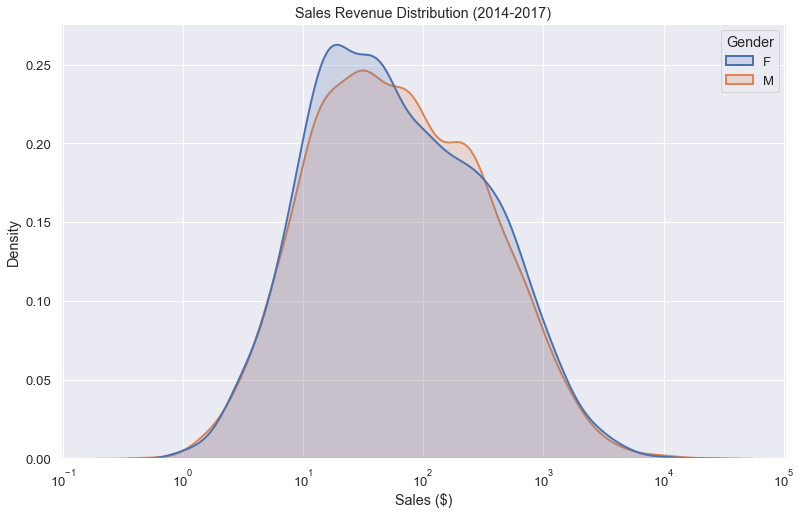

<Figure size 1440x1440 with 0 Axes>

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(data = data_w, x = "Sales", hue = "Gender", shade=True, log_scale = True, alpha=.2, linewidth=2).set(xlabel="Sales ($)")
plt.title("Sales Revenue Distribution (2014-2017)")
sns.set(style="darkgrid")
plt.figure(figsize=(20, 20))
sns.set(font_scale = 1.2)
plt.show()

We observe that products costing roughly no more than 1500$ accounted for the majority of sales.

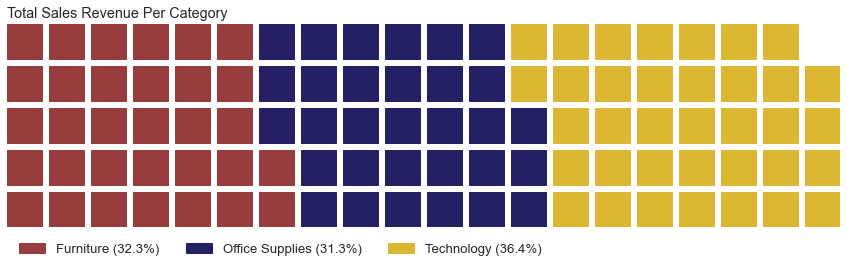

In [3]:
# !conda install --yes --prefix {sys.prefix} <package>
# conda install -c conda-forge <package>
import matplotlib.pyplot as plt
from pywaffle import Waffle

waf_data = data_w[["Category", "Sales"]].groupby(["Category"]).agg({"Sales" : "sum"})
total = sum(waf_data["Sales"])
proportions = [round((float(value) / total)*100, 2) for value in waf_data["Sales"]]# % of category sales each
waf_data["Proportions"] = proportions
waf_data = waf_data.drop(["Sales"], axis = 1)
waf_data = waf_data["Proportions"].to_dict()
fig = plt.figure(FigureClass=Waffle, rows=5, values=waf_data, figsize=(12, 8),
    colors=("#983D3D", "#232066", "#DCB732"),
    title={"label": "Total Sales Revenue Per Category", "loc": "left"},
    labels=["{0} ({1}%)".format(k, v) for k, v in waf_data.items()],
    legend={"loc": "lower left", "bbox_to_anchor": (0, -0.2), "ncol": len(waf_data), "framealpha": 0})
plt.show()

We see that the Technology category had the biggest sales revenue.

In [4]:
import plotly.express as px
df = data_w[["Category", "Sub-Category", "Sales", "Profit"]]
fig = px.treemap(df, path = ["Category", "Sub-Category"], values = "Sales", width = 800, height = 400, color = "Profit",
                  color_continuous_scale='PuOr',
                  title = "Sales Size & Profit Revenue",
                  color_continuous_midpoint=np.average(df["Profit"], weights=df["Sales"]))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

We see that the Phone subcategory under Technology came with the biggest sales revenue (largest box size). Most profiting subcategory is Copier from Technology (dark blue).

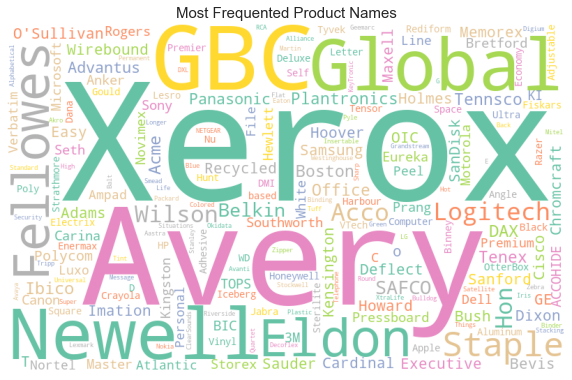

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))  
    plt.imshow(wordcloud)
    plt.title("Most Frequented Product Names", fontsize=15)
    plt.axis("off");
    
text = " ".join(cat.split()[0] for cat in data["Product Name"])
wordcloud = WordCloud(width = 800, height = 500, random_state=1, background_color="white", colormap="Set2",
                      collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

We observe that the among the most frequented word in product names is Xerox (US Company that sells print and digital document products), which means that print and digital document products are very frequently bought.

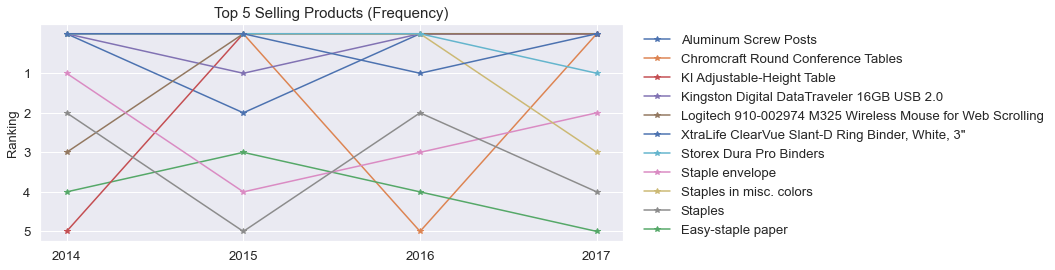

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
n = 5
bump_data = pd.DataFrame(data_w[["Product Name",
                    "Order Year"]].groupby(["Product Name",
                    "Order Year"]).size().reset_index().rename({0:"sales_trend"},
                    axis = 1)).sort_values("sales_trend", ascending = False)
bump_data_f = bump_data.groupby("Order Year").nth(np.arange(n).tolist()).reset_index() # slicing top n
rank = {i: range(1, n + 1) for i in bump_data_f["Order Year"].unique()} # ranking column
bump_data_f["Rank"] = bump_data_f["Order Year"].replace(rank)
y = bump_data_f.pivot_table(index = ["Order Year"], columns = "Product Name", values = "Rank", fill_value = 0)
#
fig, ax = plt.subplots(figsize=(12, 4))
lines = ax.plot(y.index, y, '*-')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # setting ticks correctly according to years given
ax.yaxis.set_ticks(np.arange(1, n + 1, 1))
lastrow = y.iloc[-1,:].values 
order = np.argsort(lastrow)
fig.legend(np.array(lines)[order], y.columns[order], loc='lower right', bbox_to_anchor=(1.3, .1), frameon=False) #setting the legend position and properties
#
plt.subplots_adjust(right= 0.8)
plt.gca().invert_yaxis() # set the axis so that those products that are outside the top five, don't throw themselves down, but up
plt.title("Top 5 Selling Products (Frequency)", fontsize = 15)
plt.ylabel('Ranking', fontsize = 13)
plt.show()

We observe that three products maintained their place among the top five best sellings during the 4 years. Those are:
* Staple Envelope

* Staples 

* Easy Staple Paper

**Note:** This is not in terms of sales revenue. But in terms of frequency.


### Correlation Matrix

In [7]:
#normalization function
def max_scaling(df):
    for column in df.columns:
        df[column] = df[column]  / df[column].abs().max()
    return df
pca_data_u = data_w[["Customer ID", "Sub-Category", "Sales", "Gender", "Age"]].groupby(["Customer ID", "Sub-Category", "Gender", "Age"]).agg({"Sales" : "sum"})
pca_data_u = max_scaling(pca_data_u.pivot_table(index = ["Customer ID", "Gender", "Age"], columns = "Sub-Category", values = "Sales", fill_value = 0)).reset_index().set_index("Customer ID")
# setting the structure for pca (individuals vs variables outline)
# pca_data.head(10) 
# pca_data.isnull().values.any()
# pca_data.sort_values("column")
# list(pca_data.index.values)

Text(0.5, 1.0, 'Sub Categories Correlation')

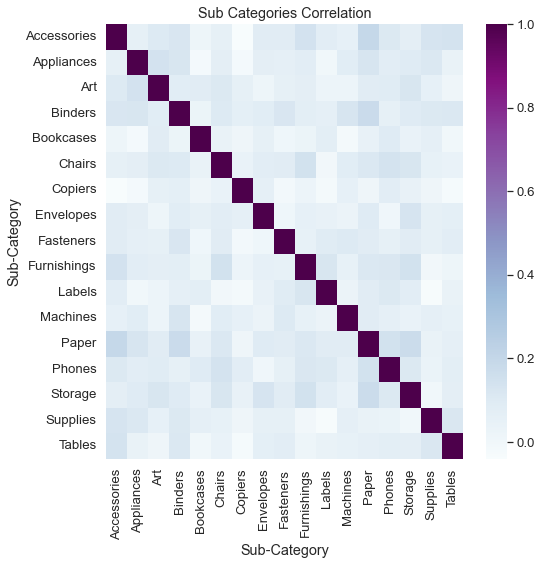

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pca_data_u_n = pca_data_u.drop(["Gender", "Age"], axis = 1)
corrMatrix = pca_data_u_n.corr(method = "spearman") # choosing spearman, as it suits the data context
fig = plt.figure(figsize=(8,8))
r = sns.heatmap(corrMatrix, cmap = "BuPu")
r.set_title("Sub Categories Correlation")

The correlation matrix shows correlation between customer spent money on one product and other products in the US. We observe that there is no significant correlation between most of the products (0.3 threshold). We explore Canada next.

Text(0.5, 1.0, 'Sub Categories Correlation')

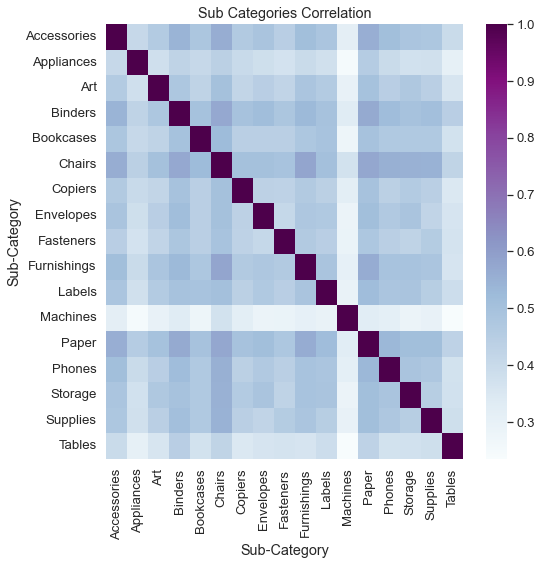

In [9]:
data_c = pd.read_csv("ca_sup.csv")
data_w_ca = pd.DataFrame(data_c)
# data_w_ca.head(7)
def max_scaling(df): # choosing this standardization or scaling method
    for column in df.columns:
        df[column] = df[column]  / df[column].abs().max()
    return df
pca_data = data_w_ca[["Customer ID", "Sub-Category", "Sales", "Gender", "Age"]].groupby(["Customer ID", "Sub-Category", "Gender", "Age"]).agg({"Sales" : "sum"})
pca_data = max_scaling(pca_data.pivot_table(index = ["Customer ID", "Gender", "Age"], columns = "Sub-Category", values = "Sales", fill_value = 0)).reset_index().set_index("Customer ID")
# # pca_data.head(7)
# # #--------
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pca_data_n = pca_data.drop(["Gender", "Age"], axis = 1)# removing non numerical variables to give it to pca
corrMatrix = pca_data_n.corr(method = "spearman")
fig = plt.figure(figsize=(8,8))
r = sns.heatmap(corrMatrix, cmap = "BuPu")
r.set_title("Sub Categories Correlation")

The correlation matrix shows correlation between customer spent money on one product and other products in Canada. We observe that there is a significant correlation between most of the products.

### PCA Scree Plot

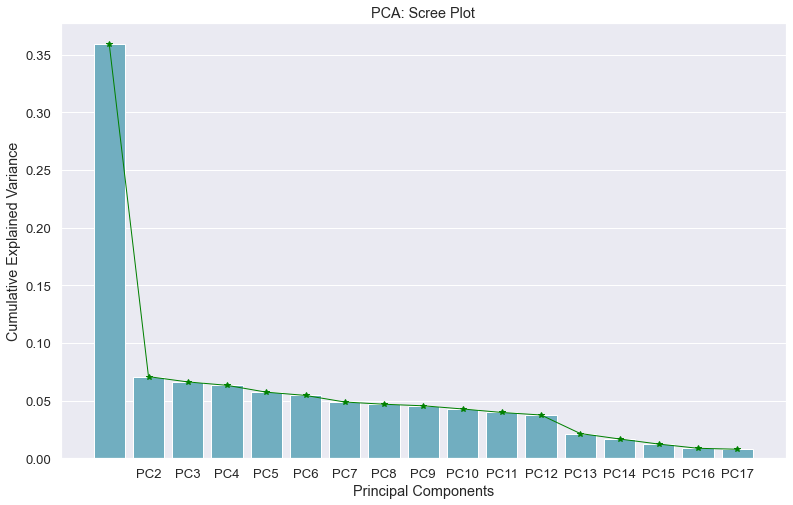

In [29]:
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pca = PCA().fit(pca_data_n)


# 1_scree plot_1
scree = pd.DataFrame({'Cumulative Explained Variance':pca.explained_variance_ratio_,'Principal Components':['PC1','PC2','PC3','PC4','PC5','PC6','PC7',
                                                                 'PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15', 'PC16', 'PC17']})
scree_plot = sns.barplot(x = 'Principal Components', y = "Cumulative Explained Variance", data = scree, color = "c").set_title('Scree Plot');
sns.set(rc = {'figure.figsize':(13,8)})
sns.set(font_scale = 1.2)

#1_scree plot_2
pc_values = np.arange(pca.n_components_) # estimated number of components from input data
plt.plot(pc_values, pca.explained_variance_ratio_, '*-', linewidth=1, color='green')
plt.title('PCA: Scree Plot')
plt.xticks(np.arange(1, len(pca_data_n.columns) + 1, 1))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
# plt.rcParams["figure.figsize"] = (20,8)
plt.show()

# we tried to overlap two scree plots

From the scree plot we can see that, PC1 almost accounts for 36% of the variations and PC2 accounts for almost 7%.

### PCA Individuals & Variables Plots

In [11]:
import random
#2_2d individuals plot + variables plot
pca_2 = PCA(n_components=2) 
components = pca_2.fit_transform(pca_data_n) # projected data
features = list(pca_data_n.columns)
loadings = pca_2.components_.T * np.sqrt(pca_2.explained_variance_) #calculating loadings
total_var = pca_2.explained_variance_ratio_.sum() * 100 # sum of explained variance ratio
parts_var = pca_2.explained_variance_ratio_
pc1_per, pc2_per = round(parts_var[0]*100, 1), round(parts_var[1]*100, 1) # to calculate (35% and 7% on x and y along PC1 & PC2)
fig = px.scatter(components, x= 0, y=1, color = pca_data["Gender"],
                 labels={"0": "PC 1 (" + str(pc1_per) + "%)", "1": "PC 2 (" + str(pc2_per) + "%)"},
                 title=f'PCA Individuals & Variables Plot | Total Explained Variance: {total_var:.2f}%')
colors = ["aliceblue", "antiquewhite", "green", "aquamarine", "azure", "beige", "bisque", "black", "blanchedalmond", 
          "blue", "blueviolet", "brown","burlywood", "cadetblue", "chartreuse", "chocolate", "coral"]#17
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        line=dict(
        color=str(random.choice(colors)), width=1), #colors for directions for the variable plot (variable and individuals plot are overlapped in our implementation)
        x1=loadings[i, 0]*4.5,
        y1=loadings[i, 1]*4.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*5.5,
        y=loadings[i, 1]*5.5,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

**Variables (Loading) Plot**
* **PC1**: the loading for every product is all positive (with emphasis on direction rather than absolute PCA values), we can take this as an indicator that PC1 represents something like: the larger the value, the higher a customer’s purchase intention (mental weighted score for each product in terms of its importance to the customer) of such subcategories. Customer purchase intent is like saying: “Indeed, I will buy item or brand X one day”. Purchase intentions are a strong, yet imperfect predictor of sales. Therefore, we can see through the Contribution plot that customers in Canada have a higher purchase intention for **Paper**, **Accessories** and **Art**, to name a few.

* **PC2**: We can see that only PC2 can separate different products into different groups in Canada, the positive side has positive PC2 values and the negative side has negative PC2 values, they might represent a way to classify our products into two separated groups (maybe in terms of pricing). 

  * G1 (Negative): **Accessories**, **Paper**, **Envelopes**, **Tables**, **Phones**, **Supplies** and **Storage**
  * G2 (Positive): **Fasteners**, **Appliances** and the rest of sub categories.
  
**Individual Plot**

* Customers that are similar to each other are grouped together. Hence, we can see that there is no difference between individuals in terms of gender. However, we see a group centered on the the negative side of PC1, in opposite to (Roughly interpreting this group as a low payer one for all sub categories, because of their opposite direction to the variables) the one on the right of PC1 (Though, we know that the coordinates of individuals and variables are not constructed on the same space, this split indicator here is merely to indicate the existence of a given split), but that's due to something else other than gender.

### Variables Contribution to PC1 & PC2

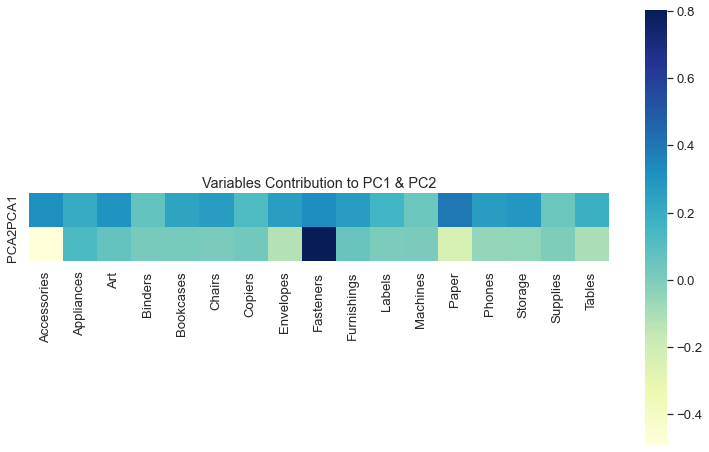

In [12]:
#3_heatmap
ax = sns.heatmap(pca_2.components_, cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca_2.n_components_+1)], xticklabels=features, 
                 cbar_kws={"orientation": "vertical"})
ax.set_title("Variables Contribution to PC1 & PC2")
ax.set_aspect("equal")
#Invert this one

<span style="color:Green; font-family:Papyrus; font-size:2em;">Customer Analysis</span>

### K-Means Clustering

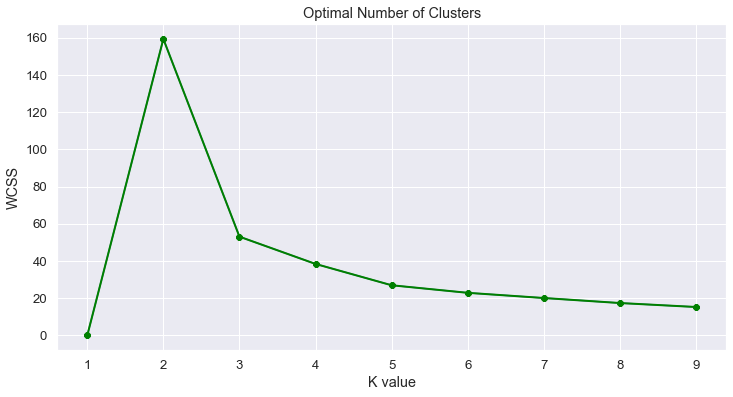

In [13]:
##clustering
from sklearn.cluster import KMeans

pca_projected_data = components #kmeans on projected data (43% variations captured for two PCs)
max_clusters = int((len(pca_data_n.columns) + 1)/2) # liming possible max clusters to to be len(variables)/2

def cluster(n, data = pca_projected_data):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    Z = kmeans.predict(data)
    return kmeans, Z

wcss_inertias = np.zeros(max_clusters)

for i in range(1, max_clusters):
    kmeans, Z = cluster(i)
    wcss_inertias[i] = kmeans.inertia_
    
plt.figure(figsize=(12,6))
plt.plot(range(1,max_clusters + 1), wcss_inertias)
plt.plot(range(1,max_clusters + 1), wcss_inertias, linewidth=2, color="green", marker ="8")
plt.xlabel("K value")
plt.xticks(np.arange(1, max_clusters + 1,1))
plt.ylabel("WCSS")
plt.title('Optimal Number of Clusters')
plt.show()

We can observe that the optimal number of customers clusters is two following the elbow method.

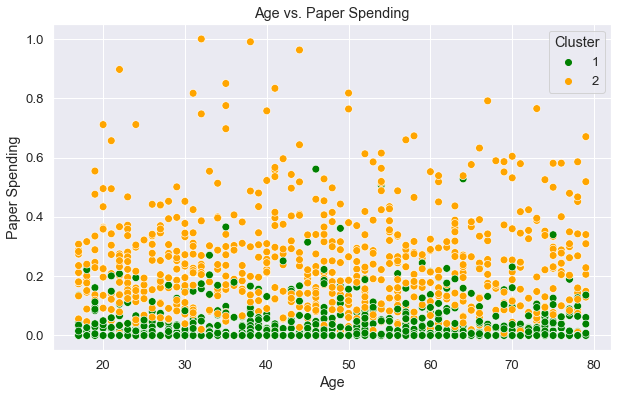

In [14]:
km, y = cluster(2)
pca_data["Cluster"] = y
#The new dataframe with the clustering done
rplace = {0: '1', 1: '2'}
pca_data['Cluster'] = pca_data['Cluster'].map(rplace)

#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Paper',hue="Cluster",  
                 palette=['green', 'orange'], legend='full', data = pca_data  , s = 60)
plt.xlabel('Age')
plt.ylabel('Paper Spending') 
plt.title('Age vs. Paper Spending')
plt.show()

Based on PCA individuals grouping, and how one group of individuals tended to spend less. We wanted to see if that less spending behaviour is related to age, and we graphed age vs paper, as paper contributed the most to PC1.

In [15]:
import plotly.graph_objects as pgo
link1 = data_w[["Segment", "Category", "Profit"]].groupby(["Segment", "Category"]).agg({"Profit" : "sum"}).reset_index().reset_index(drop=True).rename(columns={"Segment": "source", "Category": "target"})
link2 = data_w[["Category", "Region", "Profit"]].groupby(["Category", "Region"]).agg({"Profit" : "sum"}).reset_index().reset_index(drop=True).rename(columns={"Category": "source", "Region": "target"})
#links for the sankey
links = pd.concat([link1, link2]).rename(columns={"Profit": "value"}).reset_index(drop=True)
code_s = [0,1,2,3,4,5]
name_s = ["Consumer", "Corporate", "Home Office", "Furniture", "Office Supplies", "Technology"]
links['source'] = links['source'].replace(name_s, code_s)
code_t = [3,4,5,6,7,8,9]
name_t = ["Furniture", "Office Supplies", "Technology", "Central", "East", "South", "West"]
links['target'] = links['target'].replace(name_t, code_t)
links['value'] = np.where(links['value'] < 0, 1, links.value) #if profit is < 0, we put 1 to plot a thin link
nodes = ["Consumer", "Corporate", "Home Office", "Furniture", "Office Supplies",
         "Technology", "Central", "East", "South", "West"]
colors = ["greenyellow", "antiquewhite", "moccasin", "aquamarine", "azure", "beige", "bisque", "brown", "blanchedalmond", 
          "blue", "blueviolet", "brown","burlywood", "cadetblue", "chartreuse", "chocolate", "coral", "olive", "yellow",
            "khaki", "tan"]
links["color"] = colors
# #plot
fig = pgo.Figure(data=[pgo.Sankey(
    node = dict(pad = 15, thickness = 20, line = dict(color = "black", width = 0.5),
      label = nodes,
      color = "green"
    ),
    link = dict( #here we assign the data as required by the sankey to plot our graph
      source = links.source,
      target = links.target,
      value = links.value,
      color = links.color
  ))])

fig.update_layout(title_text="Flow of Profit into Regions Via Product Category (2014-2017)", font_size=10)
fig.show()

The Consumer base is the main source of profit.

In [16]:
cust_data = data_w[["Customer ID", "Sales"]].groupby(["Customer ID"]).size().reset_index().rename(columns = {0:"Number of Sales"})
cust_data = cust_data.groupby(["Number of Sales"]).size().reset_index().rename(columns = {0:"Number of Customers"}).sort_values("Number of Sales")
cust_data
import plotly.express as px
fig = px.bar(cust_data, y='Number of Customers', x='Number of Sales', text_auto='.2s',
            title="Number of sales per customer")
fig.update_xaxes(nticks=38)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", marker_color='green', cliponaxis=False)
fig.show()

10 as the number of purchases was very common among customers.

In [17]:
import plotly.express as px
fig = px.histogram(data_w, x="Quantity", color="Segment", barmode = "group", title="Quantity by Segment")
fig.update_xaxes(nticks=15)
fig.show()

We observe that the quantities 2 and 3 we very frequent among customers, especially consumers.


<span style="color:Green; font-family:Papyrus; font-size:2em;">Time Series Analysis</span>

### Calendar Maps

In [18]:
import pandas as pd
import numpy as np
from plotly_calplot import calplot

cal_data = data_w[["Order Date", "Sales"]].rename(columns = {"Order Date": "Order_Date"})
cal_data["Order_Date"] =  pd.to_datetime(cal_data.Order_Date)
cal_data = cal_data.sort_values(by="Order_Date")
cal_data

fig = calplot(
    cal_data,
    x="Order_Date",
    y="Sales",
    dark_theme=False,
    years_title=True,
    colorscale="purples",
    gap=4,
    name="Sales ($)",
    month_lines_width=4, 
    month_lines_color="#fff",
    title = "Sales Revenue Per Day"
)
fig.show()

We can manually identify days with the highest number of sales. White cells indicate that no sale acitvity had taken place.

In [19]:
import plotly.express as px
ye_data = data_w[["Order Year", "Sales", "Category"]].groupby(["Order Year", "Category"]).agg({"Sales" : "sum"}).reset_index()
ye_data
fig = px.line(ye_data, x='Order Year', y='Sales', color='Category', markers=True, title= "Sales Revenue per category (2014-17)")
fig.update_xaxes(nticks=4)
fig.show()

We see that the total sales remained relatively the same during the years 2014, and 2015, but with a significant jump in the years that followed, and that s for all categories except for Furniture.

**Note:** This is in terms of sales revenue, not in terms of sales frequency.


In [20]:
se_data = data_w[["Order Year", "Ship Mode", "Profit"]].groupby(["Order Year", "Ship Mode"]).agg({"Profit" : "sum"}).reset_index()
import plotly.express as px
fig = px.area(se_data, x="Order Year", y="Profit", color="Ship Mode", line_group="Ship Mode", title = "Profit by Ship mode (2014-17)")
fig.update_xaxes(nticks=4)
fig.show()

We see that the ship mode First Class was the one associated with the highest profits consistently throughout the 4 years.

In [21]:
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

dyn_data = data_w[["Order Date", "State", "Sales"]].groupby(["Order Date",
                    "State"]).agg({"Sales" : "sum"})
dyn_data = dyn_data.pivot_table(index = ["Order Date"], columns = "State", #setting the data for race bar chart
                    values = "Sales", fill_value = 0)#.reset_index().set_index("Customer ID")
for i in dyn_data.columns:
    dyn_data[i] = dyn_data[i].cumsum()
dyn_data = dyn_data.head(10)# showing only 10 points of time, we did this as it helps us to compile the chunk of code quickly, for a full display, we can set dyn_data = dyn_data
dyn_data
bcr.bar_chart_race(df=dyn_data, filename=None)
bcr.bar_chart_race(
    df=dyn_data,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars=49, #states
    fixed_order=False,
    fixed_max=True,
    steps_per_period=2,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center', 'size': 10, 'family': 'Courier New'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total Sales ($): {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 7, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=1000,
    figsize=(5, 6),
    dpi=140,
    cmap='dark12',
    title='Sales Revenue by State (2014-2017)',
    title_size=8,
    bar_label_size=3,
    tick_label_size=5,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.9'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .4},
    filter_column_colors=False)

This animated chart allows for a closer look on the ranking of states with regard to their sales revenue across the days from 2014 till 2017.

<span style="color:Green; font-family:Papyrus; font-size:2em;">Location Analysis</span>

In [22]:
import plotly.express as px
ye_data = data_w[["State", "Sales", "Profit"]].groupby(["State"]).agg({"Sales" : "mean", "Profit" : "mean"}).reset_index()
ye_data
fig = px.scatter(ye_data, x='Sales', y='Profit', color='State', title = "Sales vs Profit Revenue per State")
fig.update_xaxes(nticks=4)
fig.show()

We see that there are four groups of states.
* Those with negative profit.
* Those with less sales but with higher relative profit.
* Those with larger sales but with lower relative profit.
* Vermont, with average sales, yet, with very high relative profit.

In [23]:
map_data = data_w[["State", "Profit"]].groupby("State").agg({"Profit" : "sum"}).reset_index()
code = {'Alabama': 'AL','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT',
        'Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL',
        'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
        'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD',
        'Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
map_data['Code'] = map_data['State'].map(code)

fig = px.choropleth(map_data,
                    locations='Code',
                    color='Profit',
                    color_continuous_scale='spectral_r',
                    hover_name='State',
                    locationmode='USA-states',
                    labels={'Sales':'Profit $'},
                    scope='usa') #to show only usa
fig.add_scattergeo(
    locations=map_data['Code'],
    locationmode='USA-states',
    text=map_data['Code'],
    mode='text')

fig.update_layout(
    title={'text':'States Total Profit (2014-2017)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

We see that the state of California and NewYork had the biggest total profit, with Texas having the lowest of it.

In [24]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

us_city = pd.read_csv("uscities.csv")
us_city_w = pd.DataFrame(us_city).reset_index(drop=True).sort_values(by="city").rename(columns = {"city": "City", "state_name":"State"})
# us_city_w.head(20)
map_data = data_w[["City", "State", "Sales"]].groupby(["City", "State"]).agg({"Sales" : "sum"}).reset_index()
# map_data.head(50)
city_map = pd.merge(us_city_w, map_data, on=['State', 'City'])
city_map_w = city_map[['City', 'lat', 'lng', 'Sales']]
# city_map_w.loc[city_map_w["Sales"].idxmax()]

fig = px.density_mapbox(city_map_w, lat='lat', lon='lng', z='Sales', radius=22,
                        center=dict(lat=38, lon=-96.7129), zoom=3,
                        mapbox_style='carto-positron',#'stamen-terrain'
                        opacity = 1, color_continuous_scale='inferno')
fig.add_trace(
    go.Scattermapbox(
        lat=city_map_w["lat"],
        lon=city_map_w["lng"],
        mode="markers",
        showlegend=False,
        hoverinfo="skip",
        marker={
            "color": city_map_w["Sales"],
            "size": city_map_w["Sales"],
            "coloraxis": "coloraxis",
            "sizeref": (city_map_w["Sales"].max()) / 15 ** 2,
            "sizemode": "area",
        },
    )
)
fig.update_layout(
        title_text = 'Sales Revenue per City (2014-2017)')
fig.show()

We see that there are some cities that had the most of sales revenue, such as Seattle, LA, San Francesco and Philadelphia.

In [25]:
import plotly.express as px
import pandas as pd

bub_data = data_w[["City", "State", "Postal Code"]].groupby(["City", "State",
                    "Postal Code"]).size().reset_index().rename({0:"Orders:"}, axis = 1).sort_values("Orders:", ascending = True)
groups = {}
for i in bub_data["Orders:"].unique():
    if (i > 0 and i < 20):
        groups[i] = "Orders <20"
    if (i >= 20 and i < 100):
        groups[i] = "Orders: 20-100"
    if (i >= 100 and i < 200):
        groups[i] = "Orders: 100-200"
    if (i >= 200):
        groups[i] = "Orders >200"
# groups
bub_data["Group"] = bub_data["Orders:"].replace(groups)
us_city_w_bub = us_city_w[["City", "State", "lat", "lng"]]
buble_map = pd.merge(us_city_w_bub, bub_data, on=['State', 'City'])
buble_map["City_State"] = buble_map["City"] + ": " + buble_map["State"]
buble_map
fig = px.scatter_geo(buble_map, locationmode = 'USA-states',
                    lon = 'lng',
                    lat = 'lat', color="Group",
                    hover_name="City_State", size="Orders:")
fig.update_layout(
        title_text = 'Volume of Order by City in USA (2014-2017)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

We see that numerous cities had a large volume of orders, yet, cities like San Francisco, Los Angeles, Seatle and Philadelphia  has the largest volume of orders.


In [26]:
import os, io, pandas, folium, branca
import matplotlib.pyplot as plt
import folium.plugins as plugins
import folium

ship_data = data_w[["State", "Ship Mode"]].groupby(["State", "Ship Mode"]).size().reset_index().rename({0:"N"}, axis = 1)
code_t = ["First_Class", "Same_Day", "Second_Class", "Standard_Class"]
name_t = ["First Class", "Same Day", "Second Class", "Standard Class"]
ship_data['Ship Mode'] = ship_data['Ship Mode'].replace(name_t, code_t)
us_states = pd.read_csv("usstates.csv")
us_states_w = pd.DataFrame(us_states)
us_states_w["coordinates"] = us_states_w[["Latitude","Longitude"]].apply(tuple, axis=1)
ship_data_W = pd.merge(ship_data, us_states_w, on=['State'])
ship_data_W = ship_data_W.pivot_table(index = ["State", "coordinates"], columns = "Ship Mode", values = "N", fill_value = 0).reset_index()
# ship_data_W
pie_data = zip(ship_data_W.First_Class, ship_data_W.Same_Day, ship_data_W.Second_Class, ship_data_W.Standard_Class)

fig = plt.figure(figsize=(0.5, 0.5))
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)
plots = []
for sizes in pie_data:
    ax.pie(sizes, colors=("#808000", "#008000", "#800080", "#FFBF00"))
    buff = io.StringIO()
    plt.savefig(buff, format="SVG")
    buff.seek(0)
    svg = buff.read()
    svg = svg.replace("\n", "")
    plots.append(svg)
    plt.cla()
plt.clf()
plt.close()

#html for legend
legend_html = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: 115px;
    z-index:9999;
    font-size:14px;
    ">
    <p><a style="color:#808000;font-size:100%;margin-left:20px;">◼</a>&emsp;First Class</p>
    <p><a style="color:#008000;font-size:100%;margin-left:20px;">◼</a>&emsp;Same Day</p>
    <p><a style="color:#800080;font-size:100%;margin-left:20px;">◼</a>&emsp;Second Class</p>
    <p><a style="color:#FFBF00;font-size:100%;margin-left:20px;">◼</a>&emsp;Standard Class</p>
</div>
{% endmacro %}
"""
# <div style="
#     position: fixed;
#     bottom: 50px;
#     left: 50px;
#     width: 150px;
#     height: 120px;
#     z-index:9998;
#     font-size:14px;
#     background-color: #ffffff;
#     filter: blur(8px);
#     -webkit-filter: blur(8px);
#     opacity: 0.7;
#     ">
# </div>
# {% endmacro %}

loc = 'Most Used Ship Mode by State'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)
#-----------

m = folium.Map(location=(38, -96.7129), zoom_start=4)

for i, coord in enumerate(ship_data_W.coordinates):
    marker = folium.Marker(coord)
    icon = folium.DivIcon(html=plots[i])
    marker.add_child(icon)
    popup = folium.Popup(
        "First_Class: {}<br>\nSame_Day: {}<br>\nSecond_Class: {}<br>\nStandard_Class: {}".format(ship_data_W.First_Class[i], ship_data_W.Same_Day[i], ship_data_W.Second_Class[i], ship_data_W.Standard_Class[i])
    )
    marker.add_child(popup)
    m.add_child(marker)
m.get_root().add_child(legend)
m.get_root().html.add_child(folium.Element(title_html))
plugins.Geocoder().add_to(m)# adding search box
m

We see that the most dominant mode of shipping across the USA is Standard class, regardless of the volume of orders as observed in the previous graph.


In [27]:
less_sub = data_w[["State", "Category"]].groupby(["State", "Category"]).size().reset_index().rename(columns = {0: "N"}).sort_values("N", ascending = True)
less_sub = less_sub.groupby("State").nth(np.arange(1).tolist()).reset_index()
less_sub_w = pd.merge(less_sub, us_states_w, on = "State")
match = dict(zip(less_sub_w.State, less_sub_w.Category))

mp = folium.Map(location=(38, -96.7129), zoom_start=4)
for i in range(0,len(less_sub_w)):
    icon_image = str(match[less_sub_w.iloc[i]['State']])+".png"
    icon = folium.CustomIcon(
    icon_image,
    icon_size=(30, 30),
    icon_anchor=(15, 15),
    popup_anchor=(-3, -76)
)
    folium.Marker(
    location=[less_sub_w.iloc[i]['Latitude'], less_sub_w.iloc[i]['Longitude']],
    icon=icon,
    radius=float(15000.0),
    popup=str(less_sub_w.iloc[i]['State'])+":"+str(match[less_sub_w.iloc[i]['State']])
    ).add_to(mp)

legend_html = """
{% macro html(this, kwargs) %}
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    height: 115px;
    z-index:9999;
    font-size:14px;
    ">
    <p><a style="color:#808000;font-size:100%;margin-left:20px;"><img src="Technology.png" height = 20 width = 20></a>&emsp;Technology</p>
    <p><a style="color:#808000;font-size:100%;margin-left:20px;"><img src="Furniture.png" height = 20 width = 20></a>&emsp;Furniture</p>
    <p><a style="color:#808000;font-size:100%;margin-left:20px;"><img src="Office Supplies.png" height = 20 width = 20></a>&emsp;Office Supplies</p>
</div>
{% endmacro %}
"""

loc = 'Least Bought Category per State (Frequency)'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   


legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)

plugins.Geocoder().add_to(mp)
mp.get_root().html.add_child(folium.Element(title_html))
mp.get_root().add_child(legend)
mp

We observe that the dominant least bought category is the Technology one across all states, however, the state of North Dakota saw the category of office supplies as the least bought category.

**Note:** This is in terms of frequency, not in terms of sales revenue. As seen above, Technology is the dominant in terms of sales revenue.
